In [466]:
import pandas as pd
import os

plot_directory = '../images/'

os.makedirs(plot_directory, exist_ok=True)


# Step 1 - Data Extraction/Collection

In [467]:
# ETL Process

# Extract - Step 1
df = pd.read_excel('../data/Raw_Data_Customer_2023.xlsx')


# Step 2 - Exploratory Data Analysis (EDA)

## Structure, Duplicates, and Null values

In [468]:
# EDA - Step 2
df.head()

,ID,First Name,Last Name,Gender,Age,Birthday,Items Sold,Email,Phone
0,573819,LIAM,Garcia,Male,13.0,1990-05-10,18.0,liam.g@example.com,+63 9274836192
1,942736,SOPHIA,Hernandez,Female,38.0,1985-09-15,11.0,sophia.h@example.com,+63 9359017268
2,208457,NOAH,Lopez,M,31.0,1992-03-20,16.0,noah.l@example.com,+63 9263841509
3,695813,MIA,Martinez,Female,NaN,1988-07-25,5.0,MIA.M@EXAMPLE.COM,+63 9316852740
4,314972,Ethan,GONZALEZ,Male,29.0,1995-01-30,20.0,ETHAN.G@EXAMPLE.COM,+63 9367254810


In [469]:
df.info()

# Most are object dtype, must convert to appropriate types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          22 non-null     int64         
 1   First Name  22 non-null     object        
 2   Last Name   22 non-null     object        
 3   Gender      22 non-null     object        
 4   Age         18 non-null     float64       
 5   Birthday    22 non-null     datetime64[ns]
 6   Items Sold  19 non-null     float64       
 7   Email       18 non-null     object        
 8   Phone       22 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.7+ KB


In [470]:
# Check for duplicates
df.duplicated().sum()

# No duplicates

np.int64(0)

In [471]:
# Check for null values
df.isnull().sum()

# Output: 
# Age: 4 - can be imputed by computing using the Birthday column
# Items Sold: 3 - can be imputed by using the median value
# Email: 4

ID            0
First Name    0
Last Name     0
Gender        0
Age           4
Birthday      0
Items Sold    3
Email         4
Phone         0
dtype: int64

### Rows with 'Items Sold' null value

In [472]:
df[df['Items Sold'].isnull()]

,ID,First Name,Last Name,Gender,Age,Birthday,Items Sold,Email,Phone
7,147826,Amelia,TORRES,F,36.0,1987-11-15,NaN,AMELIA.T@EXAMPLE.COM,+63 9345967021
11,236450,CHARLOTTE,Reed,Female,NaN,1993-05-05,NaN,NaN,+63 9376154820
18,154893,DANIEL,Howard,M,66.0,1987-06-10,NaN,daniel.h@example.com,+63 9306572149


### Rows with 'Age' null value

In [473]:
df[df['Age'].isnull()]

,ID,First Name,Last Name,Gender,Age,Birthday,Items Sold,Email,Phone
3,695813,MIA,Martinez,Female,NaN,1988-07-25,5.0,MIA.M@EXAMPLE.COM,+63 9316852740
11,236450,CHARLOTTE,Reed,Female,NaN,1993-05-05,NaN,NaN,+63 9376154820
15,890124,MIA,Bell,Female,NaN,1988-01-25,9.0,mia.b@example.com,+63 9297314685
20,695813,MIA,Bell,Female,NaN,1988-01-25,9.0,NaN,+63 9297314685


### Rows with 'Email' null value

In [474]:
df[df['Email'].isnull()]

,ID,First Name,Last Name,Gender,Age,Birthday,Items Sold,Email,Phone
11,236450,CHARLOTTE,Reed,Female,NaN,1993-05-05,NaN,NaN,+63 9376154820
16,564309,ELIJAH,Powell,Male,29.0,1994-04-01,12.0,NaN,+63 9375028461
20,695813,MIA,Bell,Female,NaN,1988-01-25,9.0,NaN,+63 9297314685
21,208457,NOAH,Lopez,M,31.0,1992-03-20,16.0,NaN,+63 9263841509


## Basic visualizations

### Gender

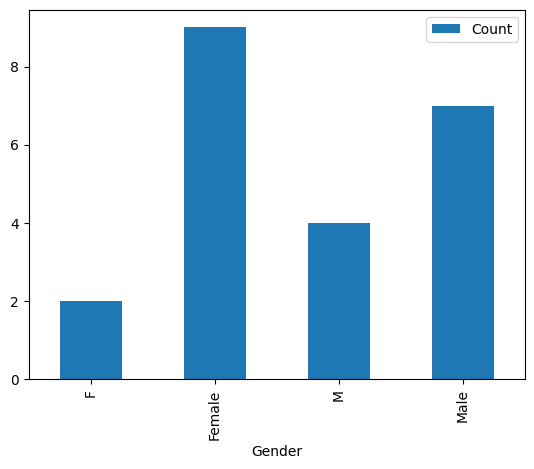

In [475]:
gender_group = df.groupby('Gender')['ID'].count().reset_index(name='Count')

ax = gender_group.plot.bar(x='Gender', y='Count')

fig = ax.figure

fig.savefig(os.path.join(plot_directory, 'raw_gender_distribution_barplot.png'))

# Output:
# F: 1
# M: 3
# Female: 7
# Male: 7

# Multiple types of only two genders are present, must standardize

### Age

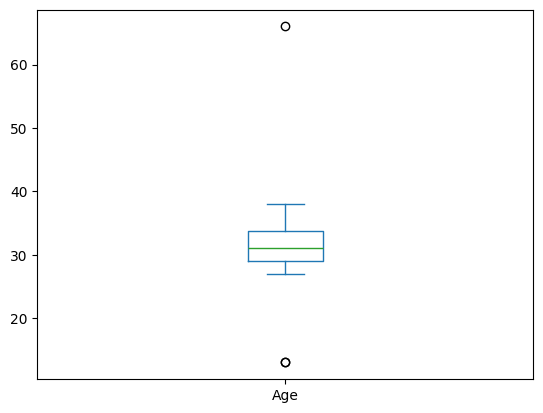

In [476]:
ax = df['Age'].plot.box()

fig = ax.figure

fig.savefig(os.path.join(plot_directory, 'raw_age_boxplot.png'))

In [477]:
df[(df['Age'] < 20) | (df['Age'] > 50)]

# Three age outliers are present
# When double-checked, the ages of the following are falsely computed

,ID,First Name,Last Name,Gender,Age,Birthday,Items Sold,Email,Phone
0,573819,LIAM,Garcia,Male,13.0,1990-05-10,18.0,liam.g@example.com,+63 9274836192
9,420583,EVELYN,Flores,Female,13.0,1991-02-25,13.0,EVELYN.F@EXAMPLE.COM,+63 9301756943
18,154893,DANIEL,Howard,M,66.0,1987-06-10,NaN,daniel.h@example.com,+63 9306572149


### Items Sold

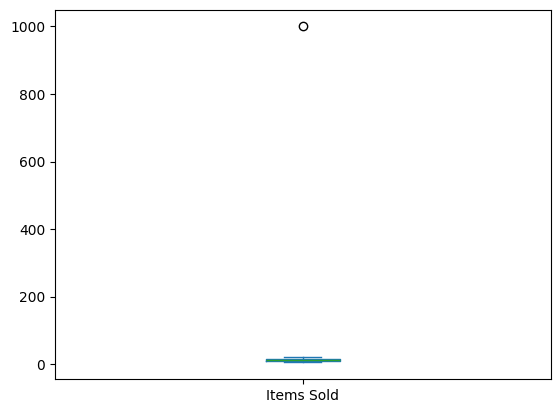

In [478]:
ax = df['Items Sold'].plot.box()

fig = ax.figure

fig.savefig(os.path.join(plot_directory, 'raw_items_sold_boxplot.png'))

# Output: 
# An outlier of 1000 items sold is present
# Clearly an error compared to the range of 1-~50

# Step 3 - Data Cleaning

## Format strings into proper casing

In [479]:
# Convert the first and last name to uppercase
df['First Name'] = df['First Name'].str.upper()
df['Last Name'] = df['Last Name'].str.upper()

df[['First Name', 'Last Name']]

,First Name,Last Name
0,LIAM,GARCIA
1,SOPHIA,HERNANDEZ
2,NOAH,LOPEZ
3,MIA,MARTINEZ
4,ETHAN,GONZALEZ
5,ISABELLA,PEREZ
6,JAMES,RAMIREZ
7,AMELIA,TORRES
8,ALEXANDER,SANCHEZ
9,EVELYN,FLORES


## Handling multiple 'Gender' categories

In [480]:
df['Gender'] = df['Gender'].str.upper()

df['Gender'] = df['Gender'].replace({'M' : 'MALE', 'F' : 'FEMALE'})

In [481]:
df['Gender']

0       MALE
1     FEMALE
2       MALE
3     FEMALE
4       MALE
5     FEMALE
6       MALE
7     FEMALE
8       MALE
9     FEMALE
10      MALE
11    FEMALE
12      MALE
13    FEMALE
14      MALE
15    FEMALE
16      MALE
17    FEMALE
18      MALE
19    FEMALE
20    FEMALE
21      MALE
Name: Gender, dtype: object

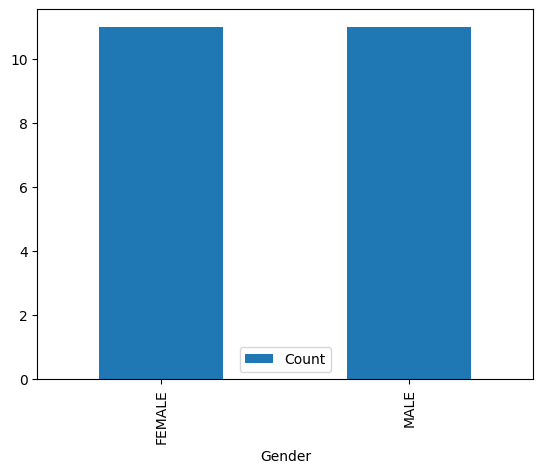

In [482]:
gender_group = df.groupby('Gender')['ID'].count().reset_index(name='Count')

ax = gender_group.plot.bar(x='Gender', y='Count')
fig = ax.figure
fig.savefig(os.path.join(plot_directory, 'processed_gender_distribution_barplot.png'))

## Handling 'Age' null values

In [483]:
# Since all birthdays are present, we can compute the age of each customer
today = pd.to_datetime('2023-12-31')

df['Birthday'] = pd.to_datetime(df['Birthday'], format='%Y-%m-%d')

# Condition for month and day to check if the birthday has occurred this year
# Substract customer's year from current year
# If exact month and day has not occured yet, subtract 0
df['Age'] = today.year - df['Birthday'].dt.year - ((today.month < df['Birthday'].dt.month) & (today.day < df['Birthday'].dt.day))


In [484]:
df['Age']

0     33
1     38
2     31
3     35
4     28
5     30
6     33
7     36
8     29
9     32
10    37
11    30
12    34
13    27
14    31
15    35
16    29
17    33
18    36
19    32
20    35
21    31
Name: Age, dtype: int32

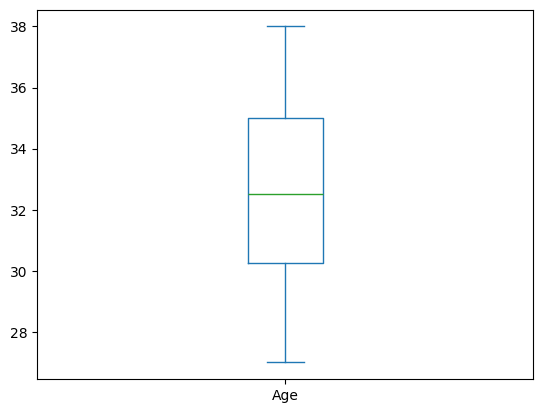

In [485]:
ax = df['Age'].plot.box()

fig = ax.figure

fig.savefig(os.path.join(plot_directory, 'processed_age_boxplot.png'))

## Handling 'Items Sold' 

In [486]:
# Remove the 1000 items sold outlier but keep the null values for later imputations
df = df[(df['Items Sold'].isnull()) | (df['Items Sold'] < 1000)].copy()

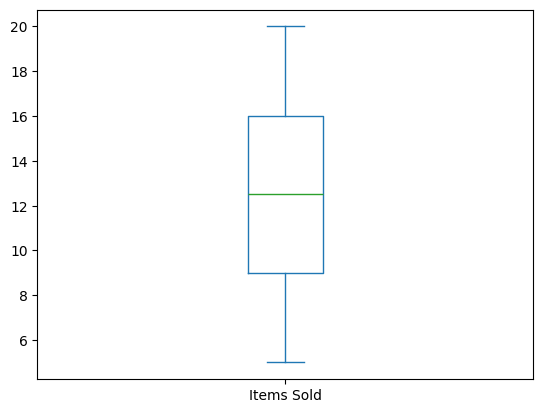

In [487]:
# Double-check if successfully removed outlier
ax = df['Items Sold'].plot.box()
fig = ax.figure
fig.savefig(os.path.join(plot_directory, 'filtered_items_sold_wo_outlier_boxplot.png'))

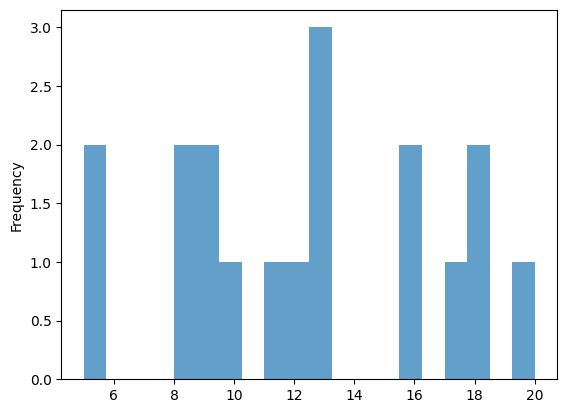

In [488]:
ax = df['Items Sold'].plot.hist(bins=20, alpha=0.7)
fig = ax.figure
fig.savefig(os.path.join(plot_directory, 'filtered_items_sold_w_null_histogram.png'))

# Histogram is not normally distributed and slightly skewed
# Use median to impute missing values

In [489]:
df['Items Sold'].median()

np.float64(12.5)

In [490]:
df['Items Sold'] = df['Items Sold'].fillna(df['Items Sold'].median())

df['Items Sold']

0     18.0
1     11.0
2     16.0
3      5.0
4     20.0
5     18.0
6     10.0
7     12.5
8     13.0
9     13.0
10    17.0
11    12.5
12     5.0
14     8.0
15     9.0
16    12.0
17    13.0
18    12.5
19     8.0
20     9.0
21    16.0
Name: Items Sold, dtype: float64

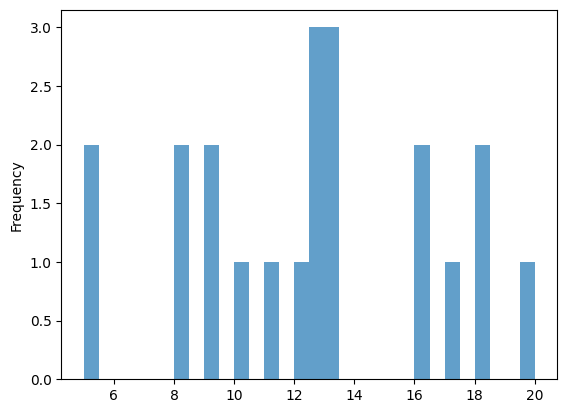

In [491]:
ax = df['Items Sold'].plot.hist(bins=30, alpha=0.7)
fig = ax.figure
fig.savefig(os.path.join(plot_directory, 'processed_items_sold_histogram.png'))

In [492]:
# Format the email into lowercase
df['Email'] = df['Email'].str.lower()

# By observing that the email format for each customer is consistent, we can extract the initial of the last name

# Store the initial last name
initial_ln = df['Last Name'].str[0]

customer_email = df['First Name'] + '.' + initial_ln + '@' + 'example.com'

df.loc[df['Email'].isnull(), 'Email'] = customer_email

df['Email'] = df['Email'].str.lower()


In [493]:
df[['First Name', 'Last Name', 'Email']].head()

,First Name,Last Name,Email
0,LIAM,GARCIA,liam.g@example.com
1,SOPHIA,HERNANDEZ,sophia.h@example.com
2,NOAH,LOPEZ,noah.l@example.com
3,MIA,MARTINEZ,mia.m@example.com
4,ETHAN,GONZALEZ,ethan.g@example.com


In [494]:
# Double-check on final DataFrame
df.head()

,ID,First Name,Last Name,Gender,Age,Birthday,Items Sold,Email,Phone
0,573819,LIAM,GARCIA,MALE,33,1990-05-10,18.0,liam.g@example.com,+63 9274836192
1,942736,SOPHIA,HERNANDEZ,FEMALE,38,1985-09-15,11.0,sophia.h@example.com,+63 9359017268
2,208457,NOAH,LOPEZ,MALE,31,1992-03-20,16.0,noah.l@example.com,+63 9263841509
3,695813,MIA,MARTINEZ,FEMALE,35,1988-07-25,5.0,mia.m@example.com,+63 9316852740
4,314972,ETHAN,GONZALEZ,MALE,28,1995-01-30,20.0,ethan.g@example.com,+63 9367254810


# Step 4 - Data Load/Store

In [495]:
# Load - Step 4
df.to_excel('../data/Processed_Customer_2023.xlsx', index=False)